In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)

In [2]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"

list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
    runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
for event in list(list_evO1O2.keys()):
    print(event)
    filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples

list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
    runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
for event in list(list_evO3a.keys()):
    if event != 'GW190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples

list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
    runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
for event in list(list_evO3b.keys()):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")

GW150914
Using Overall_posterior posterior with a total of 8350 samples
GW151226
Using Overall_posterior posterior with a total of 52252 samples
GW170104
Using Overall_posterior posterior with a total of 24972 samples
GW170608
Using Overall_posterior posterior with a total of 6448 samples
GW170809
Using Overall_posterior posterior with a total of 14802 samples
GW170814
Using Overall_posterior posterior with a total of 40000 samples
GW170818
Using Overall_posterior posterior with a total of 5862 samples
GW170823
Using Overall_posterior posterior with a total of 4278 samples
GW190408_181802
Using PublicationSamples posterior with a total of 37366 samples
GW190412
Using PublicationSamples posterior with a total of 23984 samples
GW190503_185404
Using PublicationSamples posterior with a total of 37669 samples
GW190512_180714
Using PublicationSamples posterior with a total of 37247 samples
GW190513_205428
Using PublicationSamples posterior with a total of 39072 samples
GW190517_055101
Using 

In [3]:
population_model = "PBH-lognormal-2nd"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_2/'
injections.update_cut(snr_cut=11, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 11.000000 and IFAR 0.000000 yr


In [4]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315
# prior_dict['σc'] = 0.5

# prior_dict["kappa"] = bilby.core.prior.Uniform(-6, 6, name='kappa')
# prior_dict["mmax"] = bilby.core.prior.Uniform(-6, 6, name='kappa')

prior_dict


{'mc': Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None),
 'σc': Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{fpbh}$', latex_label='$\\log_{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

21:11 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2/'
21:11 bilby INFO    : Search parameters:
21:11 bilby INFO    :   mc = Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None)
21:11 bilby INFO    :   σc = Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None)
21:11 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{fpbh}$', latex_label='$\\log_{fpbh}$', unit=None, boundary=None)
21:11 bilby INFO    :   H0 = 67.4
21:11 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:71: RuntimeWarning: divide by zero encountered in log
21:11 bilby INFO    : Single likelihood evaluation took 3.667e-01 s


0it [00:00, ?it/s]

21:11 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fb3d09e5ca0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
21:11 bilby INFO    : Checkpoint every check_point_delta_t = 60s
21:11 bilby INFO    : Using dynesty version 1.0.1
21:11 bilby INFO    : Using the bilby-implemented rwalk sampl

1006it [07:06,  7.78it/s, bound:0 nc:  3 ncall:3.5e+03 eff:28.7% logz=-1121.48+/-0.14 dlogz:70.496>0.1]    

21:18 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1301it [08:14,  3.42it/s, bound:0 nc:  6 ncall:6.5e+03 eff:20.0% logz=-1100.00+/-0.14 dlogz:50.138>0.1]

21:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1499it [09:22,  3.30it/s, bound:0 nc: 10 ncall:9.5e+03 eff:15.7% logz=-1090.22+/-0.14 dlogz:40.236>0.1]

21:21 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1613it [10:31,  2.59it/s, bound:0 nc: 25 ncall:1.3e+04 eff:12.8% logz=-1085.41+/-0.14 dlogz:35.194>0.1]

21:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1738it [11:40,  2.24it/s, bound:0 nc: 53 ncall:1.6e+04 eff:11.1% logz=-1081.45+/-0.14 dlogz:30.968>0.1]

21:23 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1817it [13:01,  3.59s/it, bound:1 nc: 36 ncall:1.8e+04 eff:10.0% logz=-1079.30+/-0.14 dlogz:28.658>0.1]

21:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1910it [14:08,  1.22it/s, bound:11 nc: 31 ncall:2.1e+04 eff:8.9% logz=-1076.57+/-0.15 dlogz:26.084>0.1]

21:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2004it [15:15,  1.36it/s, bound:21 nc: 31 ncall:2.5e+04 eff:8.2% logz=-1074.25+/-0.15 dlogz:23.566>0.1]

21:27 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2088it [16:18,  1.33it/s, bound:30 nc: 30 ncall:2.7e+04 eff:7.6% logz=-1072.13+/-0.15 dlogz:21.278>0.1]

21:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2173it [17:24,  1.26it/s, bound:39 nc: 26 ncall:3.0e+04 eff:7.1% logz=-1070.37+/-0.15 dlogz:19.343>0.1]

21:29 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2263it [18:31,  1.30it/s, bound:49 nc: 34 ncall:3.3e+04 eff:6.8% logz=-1068.76+/-0.15 dlogz:17.561>0.1]

21:30 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2351it [19:40,  1.23it/s, bound:59 nc: 39 ncall:3.7e+04 eff:6.4% logz=-1067.17+/-0.15 dlogz:15.791>0.1]

21:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2443it [20:52,  1.24it/s, bound:69 nc: 35 ncall:4.0e+04 eff:6.1% logz=-1065.77+/-0.15 dlogz:14.202>0.1]

21:32 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2538it [22:06,  1.28it/s, bound:80 nc: 33 ncall:4.4e+04 eff:5.8% logz=-1064.57+/-0.15 dlogz:12.810>0.1]

21:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2629it [23:21,  1.22it/s, bound:92 nc: 38 ncall:4.7e+04 eff:5.6% logz=-1063.49+/-0.15 dlogz:11.547>0.1]

21:35 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2717it [24:35,  1.18it/s, bound:103 nc: 34 ncall:5.1e+04 eff:5.4% logz=-1062.58+/-0.15 dlogz:10.462>0.1]

21:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2809it [25:50,  1.19it/s, bound:114 nc: 40 ncall:5.4e+04 eff:5.2% logz=-1061.73+/-0.16 dlogz:9.427>0.1] 

21:37 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2904it [27:07,  1.22it/s, bound:126 nc: 39 ncall:5.8e+04 eff:5.0% logz=-1060.95+/-0.16 dlogz:8.452>0.1]

21:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2995it [28:25,  1.16it/s, bound:138 nc:116 ncall:6.2e+04 eff:4.8% logz=-1060.27+/-0.16 dlogz:7.624>0.1]

21:40 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3089it [29:42,  1.17it/s, bound:150 nc: 80 ncall:6.6e+04 eff:4.7% logz=-1059.64+/-0.16 dlogz:6.807>0.1]

21:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3182it [31:01,  1.19it/s, bound:162 nc: 40 ncall:6.9e+04 eff:4.6% logz=-1059.10+/-0.16 dlogz:6.077>0.1]

21:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3276it [32:20,  1.17it/s, bound:174 nc: 40 ncall:7.3e+04 eff:4.5% logz=-1058.61+/-0.16 dlogz:5.397>0.1]

21:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3371it [33:37,  1.18it/s, bound:186 nc: 40 ncall:7.7e+04 eff:4.4% logz=-1058.17+/-0.16 dlogz:4.778>0.1]

21:45 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3464it [34:56,  1.15it/s, bound:198 nc: 40 ncall:8.1e+04 eff:4.3% logz=-1057.78+/-0.16 dlogz:4.203>0.1]

21:46 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
21:46 bilby INFO    : Writing 103 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3553it [36:15,  1.11it/s, bound:210 nc: 40 ncall:8.5e+04 eff:4.2% logz=-1057.44+/-0.16 dlogz:3.699>0.1]

21:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
21:48 bilby INFO    : Writing 120 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3647it [37:33,  1.17it/s, bound:222 nc: 40 ncall:8.9e+04 eff:4.1% logz=-1057.15+/-0.16 dlogz:3.230>0.1]

21:49 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
21:49 bilby INFO    : Writing 164 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3739it [38:51,  1.15it/s, bound:234 nc: 40 ncall:9.2e+04 eff:4.0% logz=-1056.88+/-0.16 dlogz:2.804>0.1]

21:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
21:50 bilby INFO    : Writing 171 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3830it [40:08,  1.16it/s, bound:246 nc: 40 ncall:9.6e+04 eff:4.0% logz=-1056.65+/-0.16 dlogz:2.425>0.1]

21:51 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
21:51 bilby INFO    : Writing 217 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3919it [41:26,  1.12it/s, bound:257 nc: 40 ncall:1.0e+05 eff:3.9% logz=-1056.46+/-0.16 dlogz:2.090>0.1]

21:53 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
21:53 bilby INFO    : Writing 263 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4011it [42:46,  1.12it/s, bound:269 nc: 40 ncall:1.0e+05 eff:3.9% logz=-1056.28+/-0.16 dlogz:1.782>0.1]

21:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
21:54 bilby INFO    : Writing 318 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4103it [44:04,  1.16it/s, bound:281 nc: 40 ncall:1.1e+05 eff:3.8% logz=-1056.13+/-0.16 dlogz:1.522>0.1]

21:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
21:55 bilby INFO    : Writing 377 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4191it [45:22,  1.10it/s, bound:293 nc: 40 ncall:1.1e+05 eff:3.8% logz=-1056.00+/-0.16 dlogz:1.294>0.1]

21:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
21:57 bilby INFO    : Writing 467 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4286it [46:40,  1.15it/s, bound:305 nc: 40 ncall:1.2e+05 eff:3.7% logz=-1055.89+/-0.16 dlogz:1.090>0.1]

21:58 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
21:58 bilby INFO    : Writing 522 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4377it [47:58,  1.16it/s, bound:317 nc: 40 ncall:1.2e+05 eff:3.7% logz=-1055.79+/-0.16 dlogz:0.913>0.1]

21:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
21:59 bilby INFO    : Writing 622 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4469it [49:17,  1.14it/s, bound:329 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1055.70+/-0.17 dlogz:0.762>0.1]

22:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
22:01 bilby INFO    : Writing 758 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4563it [50:35,  1.17it/s, bound:341 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1055.62+/-0.17 dlogz:0.630>0.1]

22:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
22:02 bilby INFO    : Writing 875 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4651it [51:53,  1.13it/s, bound:353 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1055.56+/-0.17 dlogz:0.525>0.1]

22:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
22:03 bilby INFO    : Writing 1063 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4741it [53:11,  1.15it/s, bound:365 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1055.50+/-0.17 dlogz:0.436>0.1]

22:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
22:04 bilby INFO    : Writing 1337 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4833it [54:29,  1.15it/s, bound:377 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1055.46+/-0.17 dlogz:0.360>0.1]

22:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
22:06 bilby INFO    : Writing 1514 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4924it [55:47,  1.18it/s, bound:389 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1055.41+/-0.17 dlogz:0.297>0.1]

22:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
22:07 bilby INFO    : Writing 1658 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5019it [57:05,  1.20it/s, bound:401 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1055.38+/-0.17 dlogz:0.244>0.1]

22:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
22:08 bilby INFO    : Writing 1682 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5110it [58:22,  1.16it/s, bound:412 nc: 80 ncall:1.5e+05 eff:3.4% logz=-1055.35+/-0.17 dlogz:0.202>0.1]

22:10 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
22:10 bilby INFO    : Writing 1673 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5203it [59:41,  1.19it/s, bound:424 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1055.32+/-0.17 dlogz:0.166>0.1]

22:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
22:11 bilby INFO    : Writing 1650 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5296it [1:00:59,  1.18it/s, bound:436 nc: 40 ncall:1.6e+05 eff:3.4% logz=-1055.30+/-0.17 dlogz:0.137>0.1]

22:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
22:12 bilby INFO    : Writing 1677 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5384it [1:02:17,  1.14it/s, bound:448 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1055.28+/-0.17 dlogz:0.114>0.1]

22:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
22:14 bilby INFO    : Writing 1674 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5443it [1:03:09,  1.14it/s, bound:456 nc: 80 ncall:1.6e+05 eff:3.3% logz=-1055.27+/-0.17 dlogz:0.101>0.1]

22:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
22:14 bilby INFO    : Writing 1724 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
22:14 bilby INFO    : Starting to close worker pool.
22:14 bilby INFO    : Finished closing worker pool.


5448it [1:03:11,  1.44it/s, bound:457 nc:  1 ncall:1.6e+05 eff:3.6% logz=-1055.18+/-0.17 dlogz:0.000>0.1]



22:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:14 bilby WARNING : Multiple likelihood matches found between 

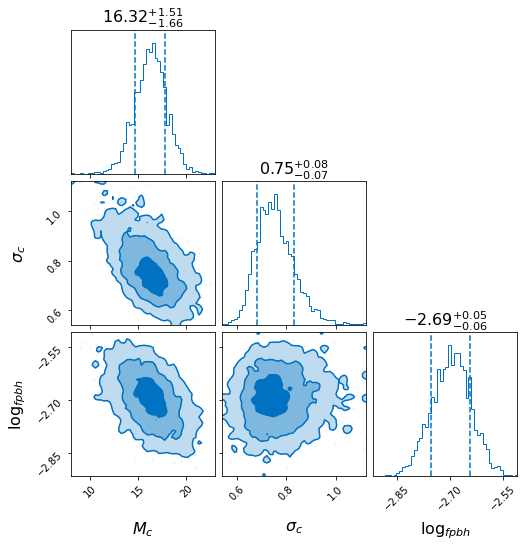

In [5]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()
